In [1]:
!pip install tensorflow
!pip install keras
!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 93% 204M/219M [00:01<00:00, 205MB/s]
100% 219M/219M [00:01<00:00, 176MB/s]


In [4]:
!unzip /content/rice-image-dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55

In [5]:
import os
import pandas as pd


In [6]:
Id = []
for dirname, _, filenames in os.walk('/content/Rice_Image_Dataset'):
  for filename in filenames:
    Id.append(os.path.join(dirname, filename))
Id.remove('/content/Rice_Image_Dataset/Rice_Citation_Request.txt')
Id[:5]


['/content/Rice_Image_Dataset/Jasmine/Jasmine (8525).jpg',
 '/content/Rice_Image_Dataset/Jasmine/Jasmine (7978).jpg',
 '/content/Rice_Image_Dataset/Jasmine/Jasmine (8687).jpg',
 '/content/Rice_Image_Dataset/Jasmine/Jasmine (2105).jpg',
 '/content/Rice_Image_Dataset/Jasmine/Jasmine (5240).jpg']

In [38]:
import tensorflow as tf
import random

In [8]:
train = tf.keras.utils.image_dataset_from_directory(
    directory='/content/Rice_Image_Dataset',
    color_mode="rgb",
    label_mode="categorical",
    batch_size=32,
    seed=12,
    subset="training",
    validation_split=.2,
    image_size=(256,256)
)

test = tf.keras.utils.image_dataset_from_directory(
    directory="/content/Rice_Image_Dataset",
    image_size = (256, 256),
    batch_size = 32,
    seed = 12,
    color_mode = 'rgb',
    label_mode = 'categorical',
    subset = 'validation',
    validation_split = 0.2,
)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [42]:
## print random images from the train data
# plt.figure(figsize = (8, 5))
# for images, labels in train.take(1):
#   plt.imshow(images)
#      for i in range(15):
#          index = random.randint(0, len(images))
#          ax = plt.subplot(3, 5, i + 1)
#          plt.imshow(images[index].numpy().astype("uint8"))
#          plt.title(train.class_names[labels[index]], color= 'blue', fontsize= 12)
#          plt.axis(False)
# plt.show()

# tensorflow model
- 98% Accuracy 





In [67]:
from keras.optimizers.legacy import adam
from keras.utils.sidecar_evaluator import optimizer

# model 1

tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(15, 5, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(15, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(8, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(), 

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

history = model.fit(train, validation_data=test, epochs=5, steps_per_epoch=len(train), validation_steps=len(test))


# tensorflow model 
- 99% Accuracy

In [77]:
# model 2

tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_2 = model_2.fit(train, epochs = 5, validation_data = test)

Epoch 1/5
1875/1875 [==============================] - 114s 60ms/step - loss: 0.1162 - accuracy: 0.9649 - val_loss: 0.0905 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 4/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0711 - val_accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0232 - accuracy: 0.9918 - val_loss: 0.0612 - val_accuracy: 0.9831


# 1.pytorch model
 -  

In [78]:
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module): ## a class called CNN, which is a subclass of nn.Module
    def __init__(self):### It defines and initializes the layers of the model.
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)###creates the first convolutional layer 
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)###This line creates the second convolutional layer 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)###It performs downsampling by taking the maximum value in each 2x2 region.
        self.fc1 = nn.Linear(32 * 25 * 25, 128)###This line creates the first fully connected layer 
        self.fc2 = nn.Linear(128, 5)###This line creates the second fully connected layer 
        self.relu = nn.ReLU()###This line creates an activation function using the rectified linear unit (ReLU) activation.
    def forward(self, x):##describes how the input x flows through the layers of the network.
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 32 * 25 * 25)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

#### The provided code demonstrates the training loop for the CNN model using the Adam optimizer in PyTorch.

model = CNN()
optimizer = optim.Adam(model.parameters())
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1):
    for i, (images, labels) in enumerate(train):
        optimizer.zero_grad()
        output = model(images)
        #output = output.data.cpu().numpy()
        #output = torch.from_numpy(output)
           
        #loss = nn.CrossEntropyLoss()(output, labels)
        loss = nn.functional.cross_entropy(output, labels)
        #loss = Variable(loss, requires_grad = True)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, i+1, len(train), loss.item()))

TypeError: ignored

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

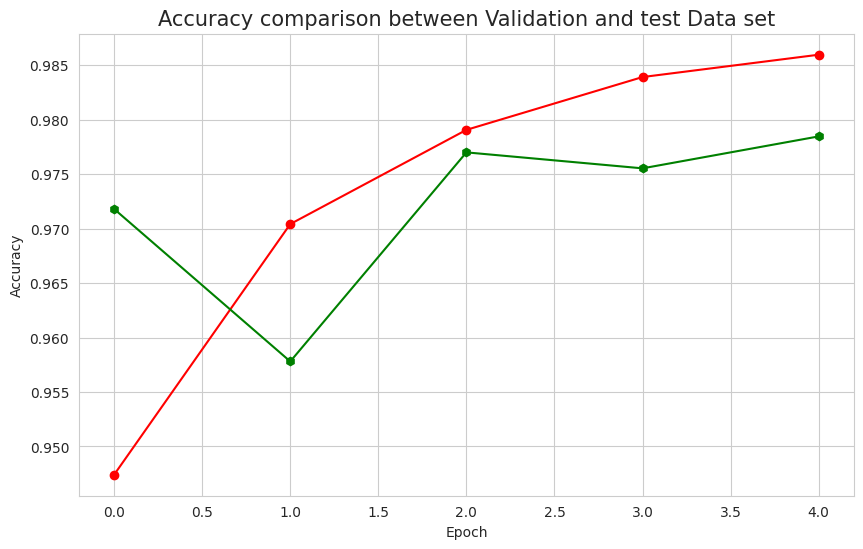

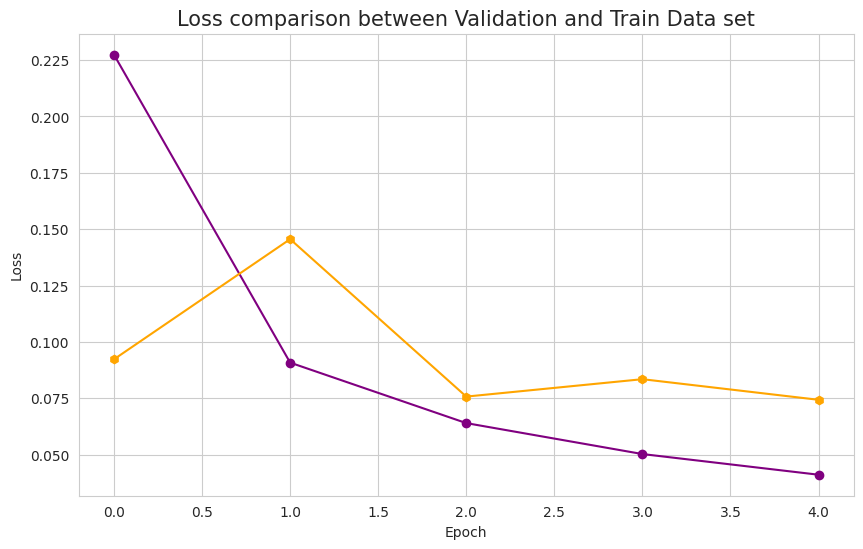

In [19]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.plot(history.history['accuracy'], color='red', marker='o')
plt.plot(history.history['val_accuracy'], color='green', marker='h')
plt.title('Accuracy comparison between Validation and test Data set', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color='Purple', marker='o')
plt.plot(history.history['val_loss'], color='Orange', marker='h')
plt.title('Loss comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [31]:
test_img = tf.keras.utils.load_img('/content/Rice_Image_Dataset/Arborio/Arborio (1).jpg',
                                   target_size=(256, 256, 3))

In [32]:
test_img = tf.keras.utils.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)

1/1 [==============================] - 0s 19ms/step


In [37]:
print(result)

[[9.9999607e-01 4.1252614e-15 9.2948096e-07 1.9084137e-06 1.0180215e-06]]
